In [68]:
# modules for research report
from datascience import *
import numpy as np
import random
import re
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# module for YouTube video
from IPython.display import YouTubeVideo

# okpy config
from client.api.notebook import Notebook
ok = Notebook('wealth-final-project.ok')
_ = ok.auth(inline=True)

Assignment: Final Project: Household Wealth in the United States
OK, version v1.12.5

Successfully logged in as samnelson@berkeley.edu


# Family & Household Wealth in the United States (2009-2013)

This dataset was originally published as part of household-specific data from the American Community Survey (ACS) — a yearly, ongoing
survey conducted by the U.S. Census Bureau — Public Use Microdata Sample (PUMS). This dataset is taken from the ACS 5-year PUMS,
spanning the years 2009-2013, and it has been cleaned for your convenience. All observations and variables not of interest have been
removed, and a random sample of the data containing 1,200 entries has been provided. A brief description of the dataset is provided
below.

**NB: You may not copy any public analyses of this dataset. Doing so will result in a zero.**

## Summary

The origins of the ACS can be traced back to the mid-20th century. That is, the postwar period in the United States that saw massive
population growth and swiftly changing household, urban and rural demographics. Beginning in the 1960s, lawmakers, unable to get
actionable data about their rapidly changing communities from the once-every-ten-years Census, started to look for
ways to get more immediate information about the people in their districts.

It wasn't until the 1990s, however, that plans to get more frequent Census-type data came to fruition. Congress, seeing a drop in
Census response rates as a result of its burdensome length, directed the U.S. Census Bureau to develop different ways to get the
much needed information. The U.S. Census Bureau, in concert with statisticians from other organizations, eventually developed a
yearly survey now known as the ACS. The ACS was officially launched in 2005. 

According to the [U.S. Census Bureau website](https://www.census.gov/programs-surveys/acs/geography-acs/areas-published.html): 
>“American Community Survey (ACS) data are tabulated for a variety of different geographic areas ranging in size from broad geographic
regions to cities, towns, county subdivisions, and block groups.” 


## Disclaimer

At the time this data was collected, the U.S. Census Bureau and the ACS only considered binary, opposite-sex couples in the context of marital status; any time this dataset mentions a married pair or a spouse, it is referring to an opposite-sex couple or partner. This dataset covers the period 2009-2013, when same-sex marriage had not yet been legalized under U.S. federal law, though some states maintained legal same-sex marriage during this time period.

## Data Description

This dataset utilizes the following abbreviations:
* `GQ`: group quarters
* `Non-Family`: a household that is not associated with any family. If referring to an individual, the respondent is considered a member of group quarters. If referring to a property, the property is considered vacant. 

This dataset contains three tables, included in the `data` folder:
1. `families_data` provides information about characteristics of each household.
2. `resources_data` provides information about the resources available to each household.
3. `states_data` provides the full names and abbreviations of U.S. states as strings, as well as an integer code for each state that corresponds to the integer codes found in the previous two tables. 

A description of each table's variables is provided below:
1. `families data`:
    * `ID`: a unique identifier for each household
    * `REGION`: region of the United States 
    * `DIVISION`: division of the United States, more specific than region
    * `STATE`: state of the United States
    * `FAMILY INCOME`: yearly income by family, not adjusted for inflation
    * `HOUSEHOLD LANGUAGE`: description of the geographic area from which the main household language is originally. The categories for Household Language are as follows: English only, and Other Non-English.
    * `HOUSEHOLD INCOME`: yearly income by household, not adjusted for inflation 
    * `WORKERS IN FAMILY`: number of workers in each family 
    * `PERSONS IN FAMILY`: number of persons in each family
     
    

2. `resources_data`: 
    * `ID`: a unique identifier for each household
    * `REGION`: region of the United States 
    * `DIVISION`: division of the United States, more specific than region
    * `STATE`: state of the United States 
    * `MONTHLY RENT`: the monthly rent each renting household is paying. If the property is owned by the household, this value is the string "Owner". 
    * `GROSS MONTHLY RENT`: the gross rent (monthly amount) each renting household is paying. If the property is owned by the household, this value is the string "Owner". 
    * `OCCUPANCY STATUS`: description of the occupancy status for a particular property; for example: “owned free and clear” or “rented.” 
    * `NUMBER OF VEHICLES`: number of vehicles a particular household has access to. 
    * `HOUSEHOLD TELEPHONE`: a binary variable, whether or not a household has access to a telephone.
    * `PROPERTY VALUE`: The value of property in dollars ($).
    
    
    
3. `states_data`:
    * `CODE`: number for reference in original table
    * `FULL NAME`: full state name
    * `ABRV`: abbreviation


## Note about Non-Family Values

Many values in the table below are categorized as "non-family" if the census respondent is not part of a family unit (e.g. the respondent
resides in group quarters). Our data contains a lot of family-specific data, like `FAMILY INCOME` or `PERSONS IN FAMILY`; it wouldn't
make sense for a person who is not part of a family to have responses to those. 

Non-family respondents, however, account for a significant portion of census data — roughly between 15%-30%, depending on the sample.
If you would like to work with the non-family respondent data, we encourage you to consider non-family-dependent variables, like
`HOUSEHOLD INCOME` or `PROPERTY VALUE`, among others. If, however, you do not want to work with these variables, we encourage you
to filter out these variables (in a process called "data cleaning") from your data before you get started. 

*Hint: if you want to clean your data so that non-family values do not appear, consider filtering using `.where`.*

## Inspiration

A variety of exploratory analyses, hypothesis tests, and predictions problems can be tackled with this data. Here are a few ideas to get you started:

1. Is there a relationship between property value and English-only-speaking households? 
2. Is there a significant difference in monthly rent for households in the West region of the United States compared to the Northeast region? 
3. How do rows containing ‘Non-Family’ data compare to responses filled by heads of Families?
4. Where is household telephone access limited? How is this associated with various measures of wealth?
5. What states and regions have higher or lower vehicle ownership? See `NUMBER OF VEHICLES`.

If you'd like to learn more about  wealth in the United States, check out the following resources:
1. [Where does your net worth rank in the United States?](https://www.nytimes.com/interactive/2019/08/12/upshot/are-you-rich-where-does-your-net-worth-rank-wealth.html) Data visualization by the *New York Times*. 
2. Consider taking Wealth & Poverty (PUBPOL C103) with former U.S. Secretary of Labor and current UC Berkeley professor Robert Reich. 
3. Consider taking Contemporary Theories of Political Economy (POLECON 101) with Professor Khalid Kadir (it's Data 8 GSI Maya's favorite class at Berkeley!).

*Credit to Prof. Lexin Li, and his course Big Data: A Public Health Perspective (PBHLTH 244), for introducing the Data 8 staff to this dataset. Feel free to ask him about your path to upper division and graduate level biostatistics courses at UC Berkeley.* 

Don't forget to review the [Final Project Guidelines](https://docs.google.com/document/d/1NuHDYTdWGwhPNRov8Y3I8y6R7Rbyf-WDOfQwovD-gmw/edit?usp=sharing) for a complete list of requirements.

## Preview

In [69]:
families_data = Table.read_table('data/families.csv').relabel(4, 'FAMILY INCOME').relabel(6, 'HOUSEHOLD INCOME')
families_data

ID,REGION,DIVISION,STATE,FAMILY INCOME,HOUSEHOLD LANGUAGE,HOUSEHOLD INCOME,WORKERS IN FAMILY,PERSONS IN FAMILY
2009000089236,South,East South Central,1,Non-Family,English only,9.81,Non-Family,Non-Family
2009000311177,South,East South Central,1,10.44,English only,10.44,1,2
2009000426047,South,East South Central,1,Non-Family,English only,9.88,Non-Family,Non-Family
2009000448671,South,East South Central,1,Non-Family,English only,11.53,Non-Family,Non-Family
2009000523654,South,East South Central,1,Non-Family,English only,10.12,Non-Family,Non-Family
2009000742214,South,East South Central,1,12.37,English only,12.37,1,2
2009001335518,South,East South Central,1,11.15,English only,11.15,3+,3
2010000145521,South,East South Central,1,10.11,English only,10.11,0,4
2010000560424,South,East South Central,1,11.78,English only,11.78,2,3
2010000853150,South,East South Central,1,Non-Family,English only,11.69,Non-Family,Non-Family


In [70]:
resources_data = Table.read_table('data/resources.csv').relabel(4, 'PROPERTY VALUE').relabel(5, 'MONTHLY RENT').relabel(6, 'GROSS MONTHLY RENT')
resources_data

ID,REGION,DIVISION,STATE,PROPERTY VALUE,MONTHLY RENT,GROSS MONTHLY RENT,OCCUPANCY STATUS,NUMBER OF VEHICLES,HOUSEHOLD TELEPHONE
2009000089236,South,East South Central,1,10860,Owner,Owner,Owned,1,True
2009000311177,South,East South Central,1,43441,Owner,Owner,Owned with loan,2,True
2009000426047,South,East South Central,1,Renter,238,238,Rented,0,True
2009000448671,South,East South Central,1,Renter,543,705,Rented,2,True
2009000523654,South,East South Central,1,21720,Owner,Owner,Owned,2,True
2009000742214,South,East South Central,1,141184,Owner,Owner,Owned with loan,1,True
2009001335518,South,East South Central,1,32580,Owner,Owner,Owned with loan,0,True
2010000145521,South,East South Central,1,74787,Owner,Owner,Owned with loan,2,True
2010000560424,South,East South Central,1,347228,Owner,Owner,Owned with loan,3,True
2010000853150,South,East South Central,1,48077,Owner,Owner,Owned,1,True


In [71]:
states_data = Table.read_table('data/states.csv')
states_data

CODE,FULL NAME,ABRV
1,Alabama,AL
2,Alaska,AK
4,Arizona,AZ
5,Arkansas,AR
6,California,CA
8,Colorado,CO
9,Connecticut,CT
10,Delaware,DE
11,District of Columbia,DC
12,Florida,FL


<br>

# Research Report

## Introduction

*Replace this text with your introduction*

## Hypothesis Testing and Prediction Questions

### Hypothesis Testing Question
For our hypothesis testing question **we wish to determine if there is a difference in family income between households where the language is English and households where the language is not English.**  
Null Hypothesis: There is no difference in family income between households where the household language is English and households where the household language is not English  
Alternative Hypothesis: There is a difference in household income between households where the household language is English and households where the household language is not English

### Prediction Question
For our prediction question, **we wish to determine if property value, family income, ratio of workers in family to the number of family members, and number of vehicles are a reasonable combination of predictors for household language**. We will K-Nearest Neighbors (using a portion of the data) to determine whether a household is English speaking or non-English speaking then use the rest of the data to determine whether or not the combination variables can predict household language. We may remove predictor variables if they harm the accuracy of the model.

## Exploratory Data Analysis

**You may change the order of the plots and tables.**

In [72]:
# JUST RUN THIS CELL
# Select Necessary columns from families_data Table
families_data = families_data.drop('REGION','DIVISION','STATE', 'HOUSEHOLD INCOME')

# Select Necessary columns from resources_data Table
resources_data = resources_data.select('ID','PROPERTY VALUE')

# Remove Non-Family Observations from families_data Table
'''Following method is a predicate for the .where() table method that selects for values that work as integers'''
def contains_numerical_value(string_value):
    if len(re.findall("\\d", string_value)) > 0: # Returns True if one or more integers is found in the string
        return True
    return False # Returns False if no integers are in the string (i.e. the string is 'Non-Family' as opposed to 10.44)

# Remove 'Non-Family' observations from table
families_data = families_data.where('FAMILY INCOME',contains_numerical_value)

# Remove Renter Observations from resources_data Table
resources_data = resources_data.where('PROPERTY VALUE', contains_numerical_value)


**Table Requiring a Join Operation**

In [73]:
# Joins resources_data and families_data
families_and_property = families_data.join('ID', resources_data)
families_and_property.show(3)

ID,FAMILY INCOME,HOUSEHOLD LANGUAGE,WORKERS IN FAMILY,PERSONS IN FAMILY,PROPERTY VALUE
2009000021130,11.98,Other Non-English,2,2,135754
2009000055450,11.75,English only,1,2,162904
2009000055870,12.98,English only,1,2,271508


*The following code is a bit of necessary type conversion. Sorry for the inconvenience but please run*

In [74]:
# Convert appropriate columns from strings to floats or integers
'''Following method checks if an item can be found in an array or list'''
def contained_in(value, list_or_array):
    for i in list_or_array:
        if i == value:
            return True
    return False

'''Following method converts all values in a table that appear to be numerical into a numerical type'''
def format_numerical(tbl, omit = make_array()):
    formatted_table = Table()
    for column_index in np.arange(tbl.num_columns):
        column = tbl.column(column_index)
        new_column = make_array()
        if contained_in(column_index, omit) == False:
            for value in column:
                if type(value) == str or type(value) == np.str_:
                    if len(re.findall("\\d", value)) > 0:
                        if len(re.findall("\\+", value)) > 0:
                            value = value.replace('+','')
                        if len(re.findall("\\.", value)) > 0:
                            new_column = np.append(new_column,float(value))
                        else:
                            new_column = np.append(new_column,int(value))
                    else:
                        new_column = np.append(new_column,value)
                else:
                    new_column = np.append(new_column, value)
            formatted_table = formatted_table.with_column(tbl.labels[column_index], new_column)
        else:
            formatted_table = formatted_table.with_column(tbl.labels[column_index], tbl.column(column_index))
    return formatted_table

families_and_property = format_numerical(families_and_property, [0]) # Converts all numbers that are type string to type float


*Next cell removes outliers*

In [81]:
# Remove outliers
'''Following method removes outlier observations based on z-scores, if a value has a z-score greater than
3, it is removed. This means any value 3 or more standard deviations away from the mean will be removed'''
def remove_outliers(original_tbl, *columns):
    tbl = original_tbl
    for column in columns:
        column = tbl.column(column)
        mean = np.mean(column)
        std = np.std(column)
        is_outlier_array = [True if abs((x - mean)/std) >= 3 else False for x in column]
        tbl = tbl.with_column('Outlier', is_outlier_array)
        tbl = tbl.where('Outlier',False)
        tbl = tbl.drop('Outlier')
    return tbl

families_and_property_clean = remove_outliers(families_and_property,'FAMILY INCOME', 'PROPERTY VALUE')

**Quantitative Plot:**


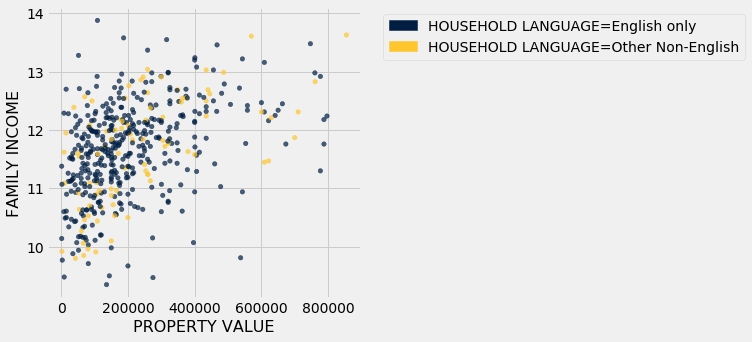

In [82]:
# Use this cell to generate your quantitative plot
# Scatter plot of English speaking and Non-English speaking households as a function of household income and property value

income_language_property = families_and_property_clean.select('FAMILY INCOME', 'HOUSEHOLD LANGUAGE','PROPERTY VALUE')
income_language_property.scatter('PROPERTY VALUE', 'FAMILY INCOME', group='HOUSEHOLD LANGUAGE')

*Replace this text with an analysis of your plot*

**Qualitative Plot:**

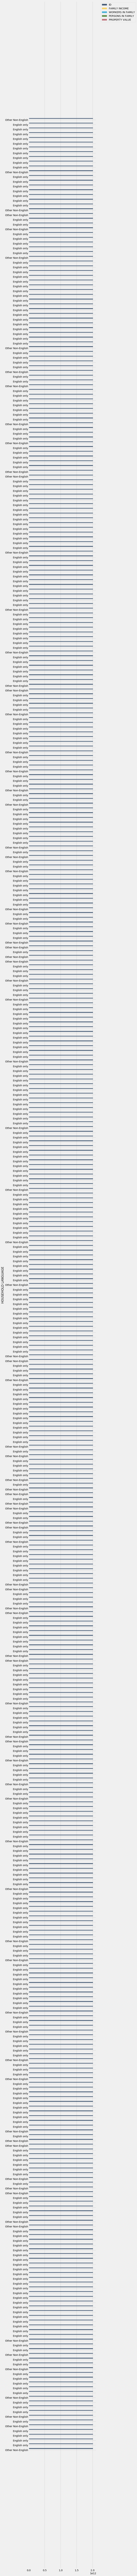

In [84]:
# Use this cell to generate your qualitative plot
families_and_property_clean.barh('HOUSEHOLD LANGUAGE')

*Replace this text with an analysis of your plot*

**Aggregated Data Table:**

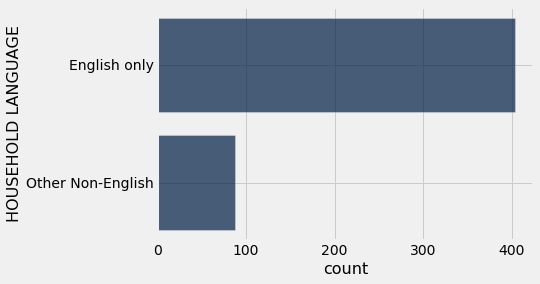

In [90]:
# Use this cell to generate your aggregated data table
language_and_income = families_and_property_clean.select('HOUSEHOLD LANGUAGE','FAMILY INCOME')

# use .group() to compile table for A/B testing english vs non-english speaking households
language_and_income.group('HOUSEHOLD LANGUAGE')

*Replace this text with an analysis of your plot*

## Hypothesis Testing

**Do not copy code from demo notebooks or homeworks! You may split portions of your code into distinct cells. Also, be sure to
set a random seed so that your results are reproducible.**

In [ ]:
# set the random seed so that results are reproducible
random.seed(1231)

# A/B Testing: two groups, Non-English (NE) speaking households and English (E) speaking households
# Test Statistic: |mean income NE - mean income E|
# Shuffle labels, recalculate test statistic
# Generate histogram
# Calculate p-value based on histogram and observed value; p-value cutoff of 0.05

## Prediction

**Be sure to set a random seed so that your results are reproducible.**

In [ ]:
# set the random seed so that results are reproducible
random.seed(1231)

# Randomly sample (with replacement) 3/5 of observations for training, 2/5 for testing
# Use testing to determine accuracy of predictors

## Conclusion

*Replace this text with your conclusion*

## Presentation

*In this section, you'll need to provide a link to your video presentation. If you've uploaded your presentation to YouTube,
you can include the URL in the code below. We've provided an example to show you how to do this. Otherwise, provide the link
in a markdown cell.*

**Link:** *Replace this text with a link to your video presentation*

In [1]:
# Full Link: https://www.youtube.com/watch?v=BKgdDLrSC5s&feature=emb_logo
# Plug in string between "v=" and ""&feature":
YouTubeVideo('BKgdDLrSC5s')

NameError: name 'YouTubeVideo' is not defined

# Submission

*Just as with the other assignments in this course, please submit your research notebook to Okpy. We suggest that you
submit often so that your progress is saved.*

In [ ]:
# Run this line to submit your work
_ = ok.submit()